# Install conda on your Colab environment

Ignore this first cell if you are running the notebook in a local environment.

One can still run it locally but it will have no effect.

In [1]:
# Run this cell first - it will install a conda distribution (mamba)
# on your Drive then restart the kernel automatically 
# (don't worry about the crashing/restarting kernel messages)
# It HAS to be runned FIRST everytime you use the notebook in colab

import os
import sys
RunningInCOLAB  = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    !pip install -q condacolab
    import condacolab
    condacolab.install()

# Set up your Colab or local environment
# Then import libraries

Run this cell in both cases of use (local or Colab)

In [2]:
import os
import sys
RunningInCOLAB  = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    
    # Check everything is fine with conda in Colab
    import condacolab
    condacolab.check()
    
    # Mount your drive environment in the colab runtime
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    
    # Change this variable to your path on Google Drive to which the repo has been cloned
    # If you followed the colab notebook 'repo_cloning.ipynb', nothing to change here
    repo_path_in_drive = '/content/drive/My Drive/Github/amn_release/'
    # Change directory to your repo cloned in your drive
    DIRECTORY = repo_path_in_drive
    os.chdir(repo_path_in_drive)
    # Copy the environment given in the environment_amn_light.yml
    !mamba env update -n base -f environment_amn_light.yml
    
    # This is one of the few Colab-compatible font
    font = 'Liberation Sans'
    
else:
    
    # In this case the local root of the repo is our working directory
    DIRECTORY = './'
    font = 'arial'

# printing the working directory files. One can check you see the same folders and files as in the git webpage.
print(os.listdir(DIRECTORY))

from Library.Build_Model import *

# We declare this function here and not in the
# function-storing python file to modify it easily
# as it can change the printouts of the methods
def printout(filename, Stats, model, time): 
    # printidng Stats
    print('Stats for %s CPU-time %.4f' % (filename, time))
    print('R2 = %.4f (+/- %.4f) Constraint = %.4f (+/- %.4f)' % \
          (Stats.train_objective[0], Stats.train_objective[1],
           Stats.train_loss[0], Stats.train_loss[1]))
    print('Q2 = %.4f (+/- %.4f) Constraint = %.4f (+/- %.4f)' % \
          (Stats.test_objective[0], Stats.test_objective[1],
           Stats.test_loss[0], Stats.test_loss[1]))

['Yeast9_medium.ipynb', '.git', 'Build_Model_AMN_Ray.ipynb', 'Create_Medium.ipynb', 'files', 'environment_amn_RS2.yml', 'Build_Dataset_parallel.ipynb', 'boxplot_train_vs_val_loss.png', 'Build_Model_MM.ipynb', 'Build_Model_AMN_KO.ipynb', 'LICENSE', 'Dataset_model', 'Build_Dataset.ipynb', 'environment_amn_RS4.yml', 'Build_Model_AMN.ipynb', 'violin_train_vs_val_loss.png', 'Dataset_experimental', 'Tutorial.ipynb', 'growth_rate_plot.html', 'Build_Model_AMN_KO_Ray.ipynb', 'Build_Model_RC (Copy).ipynb', 'AMN_QP_gridsearch.db', 'Build_Dataset_Ray2.ipynb', 'environment_amn_RS.yml', 'environment_amn_light.yml', 'Build_Dataset_KO_Ray.ipynb', 'Result', 'README.md', 'val_loss_folds_per_seed.png', 'violin_val_loss_all_folds.png', 'Build_Experimental.ipynb', 'Build_Model_RC.ipynb', 'Dataset_input', 'environment_amn.yml', 'Build_Dataset_KO.ipynb', 'Build_Dataset_3.ipynb', 'Figures', 'Library', 'Build_Model_ANN_Dense.ipynb', 'amn_dep_manual.bat', 'Reservoir', 'Build_Dataset_2.ipynb', 'Duplicate_Model.i

2025-10-08 11:58:03.056495: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-10-08 11:58:03.056519: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: raylinux
2025-10-08 11:58:03.056525: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: raylinux
2025-10-08 11:58:03.056615: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 550.144.3
2025-10-08 11:58:03.056644: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 550.144.3
2025-10-08 11:58:03.056652: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 550.144.3


In [3]:
import os
import pandas as pd

def save_training_history(history_dict, directory, trainname):
    """
    Save the training history to a CSV file with an 'epoch' column.

    Parameters:
        history_dict (dict): The `history.history` dictionary containing training metrics.
        directory (str): The directory where the history file should be saved.

    Returns:
        str: The path to the saved file.
    """
    if not os.path.exists(directory):
        os.makedirs(directory)  # Create directory if it doesn't exist

    file_path = os.path.join(directory, f"{trainname}_training_history.csv")

    # Convert the dictionary to a DataFrame
    history_df = pd.DataFrame(history_dict)
    
    # Add the 'epoch' column as the first column
    history_df.insert(0, "epochs", range(1, len(history_df) + 1))
    
    # Save to a CSV file
    history_df.to_csv(file_path, index=False)
    
    print(f"Training history saved to {file_path}")
    return file_path

In [4]:
import pandas as pd

def save_metrics_to_excel(metrics, output_file):
    """
    Saves the metrics data to an Excel file with multiple sheets.

    Parameters:
        metrics (dict): The dictionary containing metrics data.
        output_file (str): The path of the Excel file to save.
    """
    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        for seed, seed_data in metrics.items():
            # Create a DataFrame for each fold and concatenate them
            fold_dfs = []
            for fold_index, fold_content in seed_data['folds'].items():
                df = pd.DataFrame(fold_content)
                df['fold'] = fold_index  # Add fold information to the DataFrame
                fold_dfs.append(df)

            # Combine all folds into a single DataFrame
            combined_df = pd.concat(fold_dfs, ignore_index=True)

            # Write the DataFrame to a sheet named after the seed
            sheet_name = f"Seed_{seed}"
            combined_df.to_excel(writer, sheet_name=sheet_name, index=False)

# Example usage
# save_metrics_to_excel(metrics, "metrics_output.xlsx")

In [5]:
def histories_to_metrics(histories):
    metrics = {}
    for seed_index in range(len(histories)):
        fold = {}
        fold['folds'] = {}
        for fold_index in range(len(histories[seed_index])):
            fold_content = histories[seed_index][fold_index].history
            try:
                fold_content['train_loss'] = fold_content.pop('loss')
                fold_content['train_acc'] = fold_content.pop('my_r2')
                fold_content['val_acc'] = fold_content.pop('val_my_r2')
            except:
                pass
            fold_content['epochs'] = list(range(1, len(histories[seed_index][fold_index].history['train_loss']) + 1))
            fold['folds'][fold_index+1] = fold_content
        metrics[seed_index+1] = fold
    return metrics

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime

def plot_metrics(metrics, k_fold=False, log_scale=False, save_path=None):
    """
    Visualizes training, validation, and test loss and accuracy, and optionally saves the plots.

    Parameters:
    - metrics (dict): A dictionary containing loss and accuracy data for multiple seeds. Each key should represent a seed number (e.g., 0, 1, 2), and each value should be another dictionary containing:
        - 'epochs': A list or array of epoch numbers
        - 'folds': (Optional) A dictionary where each key is the fold number (e.g., 'fold_1') and each value
          is another dictionary with the same structure as the non-k-fold metrics.
        - 'train_loss': A list or array of training loss values (if not using k-fold)
        - 'val_loss': A list or array of validation loss values (if not using k-fold)
        - 'test_loss': (Optional) A list or array of test loss values (if not using k-fold)
        - 'train_acc': A list or array of training accuracy values (if not using k-fold)
        - 'val_acc': A list or array of validation accuracy values (if not using k-fold)
        - 'test_acc': (Optional) A list or array of test accuracy values (if not using k-fold)
    - k_fold (bool): Whether the data contains k-fold information.
    - log_scale (bool): Whether to use a logarithmic (base 10) scale for the y-axis.
    - save_path (str): Path to save the generated plots. A timestamped folder will be created within this path.
    """
    def apply_log_scale(ax):
        if log_scale:
            ax.set_yscale('log')
            ax.set_ylabel(f"Value (Log Scale)")

    def save_plot(fig, filename):
        if save_path:
            full_path = os.path.join(output_folder, filename)
            fig.savefig(full_path, bbox_inches='tight')

    def plot_individual(df, metric, title_suffix, filename_suffix):
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.lineplot(
            data=df[df['Metric'] == metric],
            x='Epoch', y='Value', hue='Set', style='Set', markers=True, dashes=False, ax=ax
        )
        ax.set_title(f'{metric} Over Epochs {title_suffix}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel(metric)
        apply_log_scale(ax)
        plt.tight_layout()
        if save_path:
            save_plot(fig, f"{metric.lower()}_{filename_suffix}.png")
        plt.show()

    # Create the output folder
    if save_path:
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        output_folder = os.path.join(save_path, timestamp)
        os.makedirs(output_folder, exist_ok=True)

    # Combine all seeds into a single DataFrame
    all_seeds_data = []

    for seed, seed_metrics in metrics.items():
        if k_fold:
            for fold, fold_metrics in seed_metrics['folds'].items():
                epochs = fold_metrics['epochs']
                for epoch, train_loss, val_loss, train_acc, val_acc in zip(
                    epochs, fold_metrics['train_loss'], fold_metrics['val_loss'], fold_metrics['train_acc'], fold_metrics['val_acc']):
                    all_seeds_data.append([seed, fold, epoch, 'Training', 'Loss', train_loss])
                    all_seeds_data.append([seed, fold, epoch, 'Validation', 'Loss', val_loss])
                    all_seeds_data.append([seed, fold, epoch, 'Training', 'Accuracy', train_acc])
                    all_seeds_data.append([seed, fold, epoch, 'Validation', 'Accuracy', val_acc])

                if 'test_loss' in fold_metrics and 'test_acc' in fold_metrics:
                    for epoch, test_loss, test_acc in zip(epochs, fold_metrics['test_loss'], fold_metrics['test_acc']):
                        all_seeds_data.append([seed, fold, epoch, 'Test', 'Loss', test_loss])
                        all_seeds_data.append([seed, fold, epoch, 'Test', 'Accuracy', test_acc])
        else:
            epochs = seed_metrics['epochs']
            for epoch, train_loss, val_loss, train_acc, val_acc in zip(
                epochs, seed_metrics['train_loss'], seed_metrics['val_loss'], seed_metrics['train_acc'], seed_metrics['val_acc']):
                all_seeds_data.append([seed, None, epoch, 'Training', 'Loss', train_loss])
                all_seeds_data.append([seed, None, epoch, 'Validation', 'Loss', val_loss])
                all_seeds_data.append([seed, None, epoch, 'Training', 'Accuracy', train_acc])
                all_seeds_data.append([seed, None, epoch, 'Validation', 'Accuracy', val_acc])

            if 'test_loss' in seed_metrics and 'test_acc' in seed_metrics:
                for epoch, test_loss, test_acc in zip(epochs, seed_metrics['test_loss'], seed_metrics['test_acc']):
                    all_seeds_data.append([seed, None, epoch, 'Test', 'Loss', test_loss])
                    all_seeds_data.append([seed, None, epoch, 'Test', 'Accuracy', test_acc])

    df_all_seeds = pd.DataFrame(all_seeds_data, columns=['Seed', 'Fold', 'Epoch', 'Set', 'Metric', 'Value'])

    # Average across seeds and folds
    avg_data = df_all_seeds.groupby(['Epoch', 'Set', 'Metric'])['Value'].mean().reset_index()

    # Plot averaged metrics
    sns.set_theme(style='whitegrid')

    # Combined plot for Loss and Accuracy (Average across seeds and folds)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

    # Loss Plot
    sns.lineplot(
        data=avg_data[avg_data['Metric'] == 'Loss'],
        x='Epoch', y='Value', hue='Set', markers=True, dashes=False, ax=axes[0]
    )
    axes[0].set_title('Average Loss Over Epochs (All Seeds and Folds)')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    apply_log_scale(axes[0])

    # Accuracy Plot
    sns.lineplot(
        data=avg_data[avg_data['Metric'] == 'Accuracy'],
        x='Epoch', y='Value', hue='Set', markers=True, dashes=False, ax=axes[1]
    )
    axes[1].set_title('Average Accuracy Over Epochs (All Seeds and Folds)')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    apply_log_scale(axes[1])

    plt.tight_layout()
    if save_path:
        save_plot(fig, "average_metrics_all_seeds.png")
    plt.show()

    # Individual plots for averaged metrics
    plot_individual(avg_data, 'Loss', '(All Seeds and Folds)', 'average_loss_all_seeds')
    plot_individual(avg_data, 'Accuracy', '(All Seeds and Folds)', 'average_accuracy_all_seeds')

    # Individual seed and fold plots
    for seed in df_all_seeds['Seed'].unique():
        df_seed = df_all_seeds[df_all_seeds['Seed'] == seed]

        if k_fold:
            for fold in df_seed['Fold'].dropna().unique():
                df_fold = df_seed[df_seed['Fold'] == fold]

                # Combined plot for Loss and Accuracy (Single Seed and Fold)
                fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

                # Loss Plot
                sns.lineplot(
                    data=df_fold[df_fold['Metric'] == 'Loss'],
                    x='Epoch', y='Value', hue='Set', markers=True, dashes=False, ax=axes[0]
                )
                axes[0].set_title(f'Loss Over Epochs (Seed {seed}, Fold {fold})')
                axes[0].set_xlabel('Epoch')
                axes[0].set_ylabel('Loss')
                apply_log_scale(axes[0])

                # Accuracy Plot
                sns.lineplot(
                    data=df_fold[df_fold['Metric'] == 'Accuracy'],
                    x='Epoch', y='Value', hue='Set', markers=True, dashes=False, ax=axes[1]
                )
                axes[1].set_title(f'Accuracy Over Epochs (Seed {seed}, Fold {fold})')
                axes[1].set_xlabel('Epoch')
                axes[1].set_ylabel('Accuracy')
                apply_log_scale(axes[1])

                plt.tight_layout()
                if save_path:
                    save_plot(fig, f"metrics_seed_{seed}_fold_{fold}.png")
                plt.show()

                # Individual plots
                plot_individual(df_fold, 'Loss', f'(Seed {seed}, Fold {fold})', f"loss_seed_{seed}_fold_{fold}")
                plot_individual(df_fold, 'Accuracy', f'(Seed {seed}, Fold {fold})', f"accuracy_seed_{seed}_fold_{fold}")

        else:
            # Combined plot for Loss and Accuracy (Single Seed)
            fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

            # Loss Plot
            sns.lineplot(
                data=df_seed[df_seed['Metric'] == 'Loss'],
                x='Epoch', y='Value', hue='Set', markers=True, dashes=False, ax=axes[0]
            )
            axes[0].set_title(f'Loss Over Epochs (Seed {seed})')
            axes[0].set_xlabel('Epoch')
            axes[0].set_ylabel('Loss')
            apply_log_scale(axes[0])

            # Accuracy Plot
            sns.lineplot(
                data=df_seed[df_seed['Metric'] == 'Accuracy'],
                x='Epoch', y='Value', hue='Set', markers=True, dashes=False, ax=axes[1]
            )
            axes[1].set_title(f'Accuracy Over Epochs (Seed {seed})')
            axes[1].set_xlabel('Epoch')
            axes[1].set_ylabel('Accuracy')
            apply_log_scale(axes[1])

            plt.tight_layout()
            if save_path:
                save_plot(fig, f"metrics_seed_{seed}.png")
            plt.show()

            # Individual plots
            plot_individual(df_seed, 'Loss', f'(Seed {seed})', f"loss_seed_{seed}")


# If you use WSL2

In [6]:
import os

# Manually specify the correct directory
DIRECTORY = "/mnt/c/Users/MSI/Documents/amn_release/"  # Change this to your actual path

# Change to that directory
os.chdir(DIRECTORY)

# Confirm the change
print("Current working directory:", os.getcwd())

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/MSI/Documents/amn_release/'

In [ ]:
from cobra import Configuration
config = Configuration()
config.solver = "glpk"  # Alternative solver

# Hybrid models

# Examples of trainable AMN models (neural and mechanistic)

## Using FBA simulated training sets or experimental datasets

Each cell is showing a different setup: 

- using either E. coli core simulations, iML1515 simulations, or the experimental dataset as the training set;
- using either LP, QP or Wt as the mechanistic layer of the AMNs

## AMN-QP with experimental training set

## Pre training

In [7]:
# Create, train and evaluate AMN_QP models on experimental training set with UB 
# Repeat the process with different seeds
# This cell takes several hours to execute
import random

epoch_input = 20
fold_input = 5
seed_input = 1

counter = 1

seed_q2_dict = {}

while counter <= 1:
    
    histories = {}

    Maxloop, Q2, PRED = seed_input, [], []

    for Nloop in range(Maxloop):
        
        # What you can change 
        seed = Nloop+counter+125
        np.random.seed(seed)
        
        ####
        # Set all seeds
        random.seed(seed)
        tf.random.set_seed(seed)
        
        # TF 2.6.0 deterministic settings
        os.environ['TF_DETERMINISTIC_OPS'] = '1'
        os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
        ####

        experiment_name = f'20250321_{epoch_input}-{fold_input}-{seed_input}_seed{seed}_fixedseed'
        print(f"===== Seed: {seed} =====")
        
        #np.random.seed(seed=seed)  
        trainname = 'iML1515_ec6_UB'
        #trainname = 'iML1515_ec_EXP_GR4_UB'
        #trainname = 'iML1515_EXP_UB'
        timestep = 4
        # End of What you can change

        # Create model 100% for training 0% for testing
        trainingfile = DIRECTORY+'Dataset_model/'+trainname
        model = Neural_Model(trainingfile = trainingfile, 
                objective=['BIOMASS_Ec_iML1515_core_75p37M'], 
                model_type = 'AMN_QP',
                scaler = True,
                timestep = timestep, learn_rate=0.001,
                n_hidden = 1, hidden_dim = 500,
                #train_rate = 1.0e-2,
                epochs = epoch_input, xfold = fold_input, 
                verbose=False, batch_size=100) #
        print("-------> Model's Batch Size:", model.batch_size)
        # Train and evaluate
        reservoirname = trainname +'_'+model.model_type
        reservoirfile = DIRECTORY+'Reservoir/'+reservoirname
        start_time = time.time()
        reservoir, pred, stats, history = train_evaluate_model(model, verbose=2, seed=seed) #True
        delta_time = time.time() - start_time

        histories[Nloop] = history
        print("----------------------------------")
        print("Delta Time:", delta_time)
        print("----------------------------------")
        # Printing cross-validation results
        printout(reservoirname, stats, model, delta_time)
        r2 = r2_score(model.Y, pred[:,0], multioutput='variance_weighted')
        print('Iter', Nloop, 'Collated Q2', r2)
        Q2.append(r2)
        PRED.append(pred[:,0])

    # Save in Result folder
    Q2, PRED = np.asarray(Q2), np.asarray(PRED)
    print('Averaged Q2 = %.4f (+/- %.4f)' % (np.mean(Q2), np.std(Q2)))
    filename = DIRECTORY+'Result/'+reservoirname+'_Q2_'+experiment_name+'.csv'
    np.savetxt(filename, Q2, delimiter=',')
    filename = DIRECTORY+'Result/'+reservoirname+'_PRED_'+experiment_name+'.csv'
    np.savetxt(filename, PRED, delimiter=',')

    seed_q2_dict[seed] = np.mean(Q2)
    print(seed_q2_dict)

    counter += 1

===== Seed: 126 =====
Set parameter Username
Set parameter LicenseID to value 2656971
Academic license - for non-commercial use only - expires 2026-04-26
-------> Model's Batch Size: 100
AMN scaler 7.95
QP input shape (11000, 38) (11000, 4)
-------train [    0     1     3 ... 10996 10997 10999] (8800, 38) (8800, 4)
-------test  [    2     4    14 ... 10994 10995 10998] (2200, 38) (2200, 4)
Using GPU: NVIDIA GeForce RTX 2070 SUPER
Tensorflow GPU Memory Growth is set to be True
----------------------------------- AMN_QP
Dense layer n_hidden, hidden_dim, output_dim, activation, trainable: 1 500 1186 relu True


2025-05-03 12:38:46.052466: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-05-03 12:38:46.060982: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


AMN output shapes for PoutV, SV, PinV, Vpos, V, outputs (None, 1) (None, 1) (None, 1) (None, 1) (None, 1186) (None, 2376)
PoutV: (None, 1)
SV: (None, 1)
PinV: (None, 1)
Vpos: (None, 1)
V: (None, 1186)
V0: KerasTensor(type_spec=TensorSpec(shape=(None, 1186), dtype=tf.float32, name=None), name='tf.__operators__.add_1/AddV2:0', description="created by layer 'tf.__operators__.add_1'")
Vin: KerasTensor(type_spec=TensorSpec(shape=(None, 38), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
Vout: tf.Tensor([], shape=(0, 0), dtype=float32)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 38)]         0           []                               
                                                                                                  
 dense 

2025-05-03 12:39:57.350750: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


AMN output shapes for PoutV, SV, PinV, Vpos, V, outputs (None, 1) (None, 1) (None, 1) (None, 1) (None, 1186) (None, 2376)
PoutV: (None, 1)
SV: (None, 1)
PinV: (None, 1)
Vpos: (None, 1)
V: (None, 1186)
V0: KerasTensor(type_spec=TensorSpec(shape=(None, 1186), dtype=tf.float32, name=None), name='tf.__operators__.add_15/AddV2:0', description="created by layer 'tf.__operators__.add_15'")
Vin: KerasTensor(type_spec=TensorSpec(shape=(None, 38), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
Vout: tf.Tensor([], shape=(0, 0), dtype=float32)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 38)]         0           []                               
                                                                                                  
 de

2025-05-03 12:41:08.760717: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


AMN output shapes for PoutV, SV, PinV, Vpos, V, outputs (None, 1) (None, 1) (None, 1) (None, 1) (None, 1186) (None, 2376)
PoutV: (None, 1)
SV: (None, 1)
PinV: (None, 1)
Vpos: (None, 1)
V: (None, 1186)
V0: KerasTensor(type_spec=TensorSpec(shape=(None, 1186), dtype=tf.float32, name=None), name='tf.__operators__.add_29/AddV2:0', description="created by layer 'tf.__operators__.add_29'")
Vin: KerasTensor(type_spec=TensorSpec(shape=(None, 38), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
Vout: tf.Tensor([], shape=(0, 0), dtype=float32)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 38)]         0           []                               
                                                                                                  
 de

2025-05-03 12:42:19.090763: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


AMN output shapes for PoutV, SV, PinV, Vpos, V, outputs (None, 1) (None, 1) (None, 1) (None, 1) (None, 1186) (None, 2376)
PoutV: (None, 1)
SV: (None, 1)
PinV: (None, 1)
Vpos: (None, 1)
V: (None, 1186)
V0: KerasTensor(type_spec=TensorSpec(shape=(None, 1186), dtype=tf.float32, name=None), name='tf.__operators__.add_43/AddV2:0', description="created by layer 'tf.__operators__.add_43'")
Vin: KerasTensor(type_spec=TensorSpec(shape=(None, 38), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'")
Vout: tf.Tensor([], shape=(0, 0), dtype=float32)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 38)]         0           []                               
                                                                                                  
 de

2025-05-03 12:43:30.913262: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


AMN output shapes for PoutV, SV, PinV, Vpos, V, outputs (None, 1) (None, 1) (None, 1) (None, 1) (None, 1186) (None, 2376)
PoutV: (None, 1)
SV: (None, 1)
PinV: (None, 1)
Vpos: (None, 1)
V: (None, 1186)
V0: KerasTensor(type_spec=TensorSpec(shape=(None, 1186), dtype=tf.float32, name=None), name='tf.__operators__.add_57/AddV2:0', description="created by layer 'tf.__operators__.add_57'")
Vin: KerasTensor(type_spec=TensorSpec(shape=(None, 38), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
Vout: tf.Tensor([], shape=(0, 0), dtype=float32)
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 38)]         0           []                               
                                                                                                  
 de

## Experimental Data

In [8]:
# Create, train and evaluate AMN_QP models on experimental training set with UB 
# Repeat the process with different seeds
# This cell takes several hours to execute
import random
import csv
from datetime import datetime

date_str = datetime.now().strftime('%Y%m%d%H%M%S')

epoch_input = 20
fold_input = 5
seed_input = 1

counter = 1

seed_q2_dict = {}

while counter <= 200: #200
    
    histories = {}

    Maxloop, Q2, PRED = seed_input, [], []

    for Nloop in range(Maxloop):
        
        # What you can change 
        seed = Nloop+counter
        np.random.seed(seed)
        
        ####
        # Set all seeds
        random.seed(seed)
        tf.random.set_seed(seed)
        
        # TF 2.6.0 deterministic settings
        os.environ['TF_DETERMINISTIC_OPS'] = '1'
        os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
        ####

        experiment_name = f'{date_str}_ec_{epoch_input}-{fold_input}-{seed_input}_seed{seed}_fixedseed'
        print(f"===== Seed: {seed} =====")
        
        #np.random.seed(seed=seed)  
        trainname = 'iML1515_ec_EXP_UB'
        #trainname = 'iML1515_ec_EXP_GR4_UB'
        #trainname = 'iML1515_EXP_UB'
        timestep = 4
        # End of What you can change

        # Create model 100% for training 0% for testing
        trainingfile = DIRECTORY+'Dataset_model/'+trainname
        model = Neural_Model(trainingfile = trainingfile, 
                objective=['BIOMASS_Ec_iML1515_core_75p37M'], 
                model_type = 'AMN_QP',
                scaler = True,
                timestep = timestep, learn_rate=0.0035571165697748895, #0.001
                n_hidden = 1, hidden_dim = 512,
                #train_rate = 1.0e-2,
                epochs = epoch_input, xfold = fold_input, 
                verbose=False, batch_size=8) #
        #print("-------> Model's Batch Size:", model.batch_size)
        # Train and evaluate
        reservoirname = trainname +'_'+model.model_type
        reservoirfile = DIRECTORY+'Reservoir/'+reservoirname
        start_time = time.time()
        reservoir, pred, stats, history = train_evaluate_model(model, verbose=False, seed=seed) #True
        delta_time = time.time() - start_time

        histories[Nloop] = history
        print("----------------------------------")
        print("Delta Time:", delta_time)
        print("----------------------------------")
        # Printing cross-validation results
        printout(reservoirname, stats, model, delta_time)
        r2 = r2_score(model.Y, pred[:,0], multioutput='variance_weighted')
        print('Iter', Nloop, 'Collated Q2', r2)
        Q2.append(r2)
        PRED.append(pred[:,0])

    # Save in Result folder
    Q2, PRED = np.asarray(Q2), np.asarray(PRED)
    print('Averaged Q2 = %.4f (+/- %.4f)' % (np.mean(Q2), np.std(Q2)))
    filename = DIRECTORY+'Result/'+reservoirname+'_Q2_'+experiment_name+'.csv'
    np.savetxt(filename, Q2, delimiter=',')
    filename = DIRECTORY+'Result/'+reservoirname+'_PRED_'+experiment_name+'.csv'
    np.savetxt(filename, PRED, delimiter=',')
    filename = DIRECTORY+'Result/'+reservoirname+'_TIME_'+experiment_name+'.csv'
    np.savetxt(filename, np.atleast_1d(delta_time), delimiter=',')

    seed_q2_dict[seed] = np.mean(Q2)
    print(seed_q2_dict)


    metrics = histories_to_metrics(histories)
    metrics = metrics[1]['folds']
    # Extract final loss per run from histories
    loss_records = []

    for i in range(len(metrics)):
        k = (i+1)
        hist = metrics[k]
        final_train_loss = hist['train_loss'][-1]
        final_val_loss = hist['val_loss'][-1]
        loss_records.append([k, final_train_loss, final_val_loss])

    # Save to CSV
    loss_filename = DIRECTORY + f'Result/{reservoirname}_LOSS_{experiment_name}.csv'
    with open(loss_filename, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Run', 'Final_Train_Loss', 'Final_Val_Loss'])
        writer.writerows(loss_records)


    counter += 1

#n_hidden = 1, hidden_dim = 500, seed 126 --> 0.7386984047454802

===== Seed: 1 =====
Using standard K-Fold for regression task.
No GPU detected. Training will use CPU.
V0: (None, 7740)
Vin: (None, 38)
Vout: (0, 0)
nbr parameters: 3990588
---------- 1
---------- 1
train = 0.82 test = 0.72 loss-train = 0.000005 loss-test = 0.000008 iter=0
No GPU detected. Training will use CPU.
V0: (None, 7740)
Vin: (None, 38)
Vout: (0, 0)
nbr parameters: 3990588
---------- 1
---------- 1
train = 0.72 test = 0.33 loss-train = 0.000006 loss-test = 0.000007 iter=0
No GPU detected. Training will use CPU.
V0: (None, 7740)
Vin: (None, 38)
Vout: (0, 0)
nbr parameters: 3990588
---------- 1
looping bad training iter=0 r2=-7.8617
---------- 1
train = -7.86 test = -7.09 loss-train = 0.000001 loss-test = 0.000001 iter=0
No GPU detected. Training will use CPU.
V0: (None, 7740)
Vin: (None, 38)
Vout: (0, 0)
nbr parameters: 3990588
---------- 1
---------- 1
train = 0.82 test = 0.69 loss-train = 0.000005 loss-test = 0.000005 iter=0
No GPU detected. Training will use CPU.
V0: (None, 7

# Metrics

In [75]:
metrics = histories_to_metrics(histories)
metrics = metrics[1]['folds']
metrics

{1: {'val_loss': [0.002430781489238143,
   0.0007260930142365396,
   0.0046330406330525875,
   0.00040457892464473844,
   0.0004591901961248368,
   0.0022149982396513224,
   0.00039319589268416166,
   0.0007853010320104659,
   0.00046677226782776415,
   0.0003923741460312158,
   0.00037730493932031095,
   0.00043691458995454013,
   0.00029786486993543804,
   0.0007522536907345057,
   0.0003536006261128932,
   0.0002627956273499876,
   0.0006396393291652203,
   0.0005309680127538741,
   0.0002114023081958294,
   0.0005995755200274289],
  'train_loss': [0.029328858479857445,
   0.004652498289942741,
   0.004945480264723301,
   0.004600558429956436,
   0.004535738378763199,
   0.0034841797314584255,
   0.0033157789148390293,
   0.002888686954975128,
   0.0021015654783695936,
   0.0014921999536454678,
   0.001336601679213345,
   0.0013458254979923368,
   0.0010666283778846264,
   0.0012533045373857021,
   0.0010836349101737142,
   0.0009777691448107362,
   0.0007936189067550004,
   0.00094

In [79]:
for i in range(len(metrics)):
    k = i+1
    print(k)

1
2
3
4
5


In [83]:
for i in range(len(metrics)):
    k = (i+1)
    hist = metrics[k]
    final_train_loss = hist['train_loss'][-1]
    final_val_loss = hist['val_loss'][-1]

In [10]:
reservoir.save(reservoirfile)

./Reservoir/iML1515_ec7_UB_AMN_QP_param.csv


In [52]:
metrics = histories_to_metrics(histories)

In [21]:
metrics

{1: {'folds': {1: {'val_loss': [6.836073589511216e-05,
     6.793226930312812e-05,
     6.787115125916898e-05,
     6.78444339428097e-05,
     6.782879790989682e-05,
     6.78182186675258e-05,
     6.781101546948776e-05,
     6.780556577723473e-05,
     6.780109833925962e-05,
     6.779778050258756e-05,
     6.779514660593122e-05,
     6.779396790079772e-05,
     6.77929274388589e-05,
     6.77919524605386e-05,
     6.779110117349774e-05,
     6.779030809411779e-05,
     6.778955139452592e-05,
     6.778885290259495e-05,
     6.778815441066399e-05,
     6.778751412639394e-05],
    'lr': [0.001,
     0.001,
     0.001,
     0.001,
     0.001,
     0.001,
     0.001,
     0.001,
     0.001,
     0.001,
     0.001,
     0.0005,
     0.0005,
     0.0005,
     0.0005,
     0.0005,
     0.0005,
     0.0005,
     0.0005,
     0.0005],
    'train_loss': [0.0002453279448673129,
     6.589997792616487e-05,
     6.545309588545933e-05,
     6.532760744448751e-05,
     6.526475044665858e-05,
     6

In [13]:
save_metrics_to_excel(metrics, f"Result/history/{reservoirname}_{experiment_name}_history.xlsx")

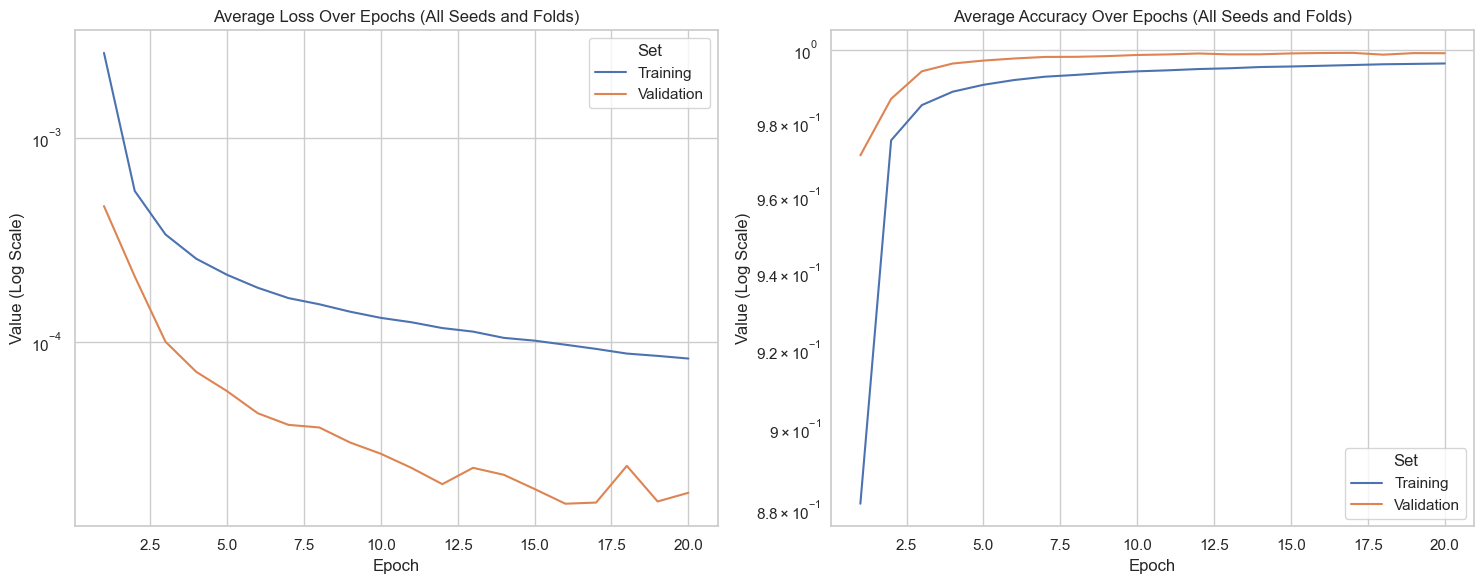

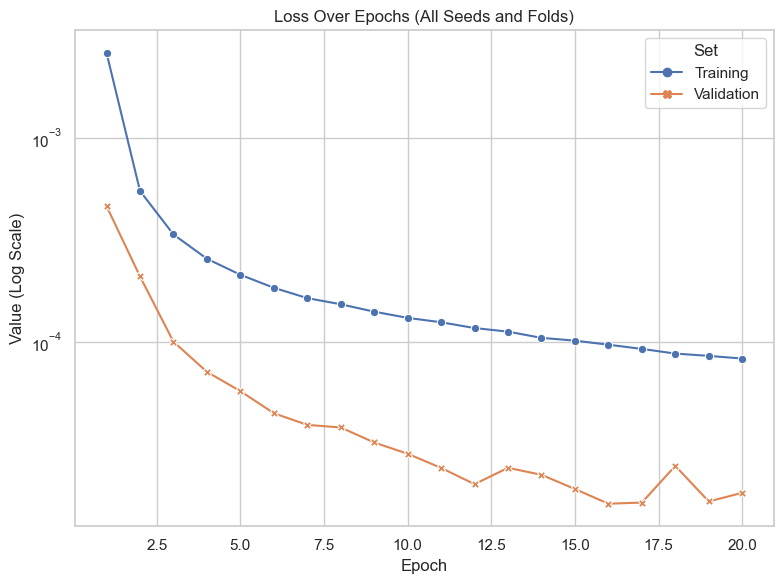

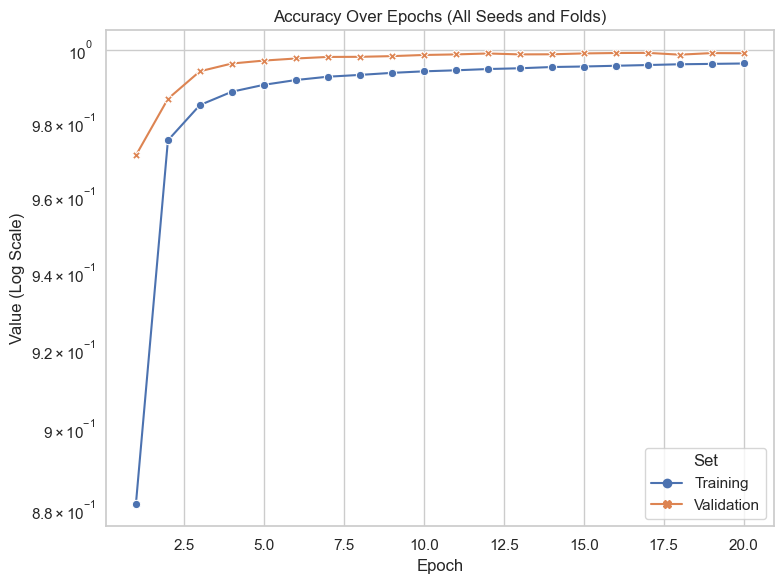

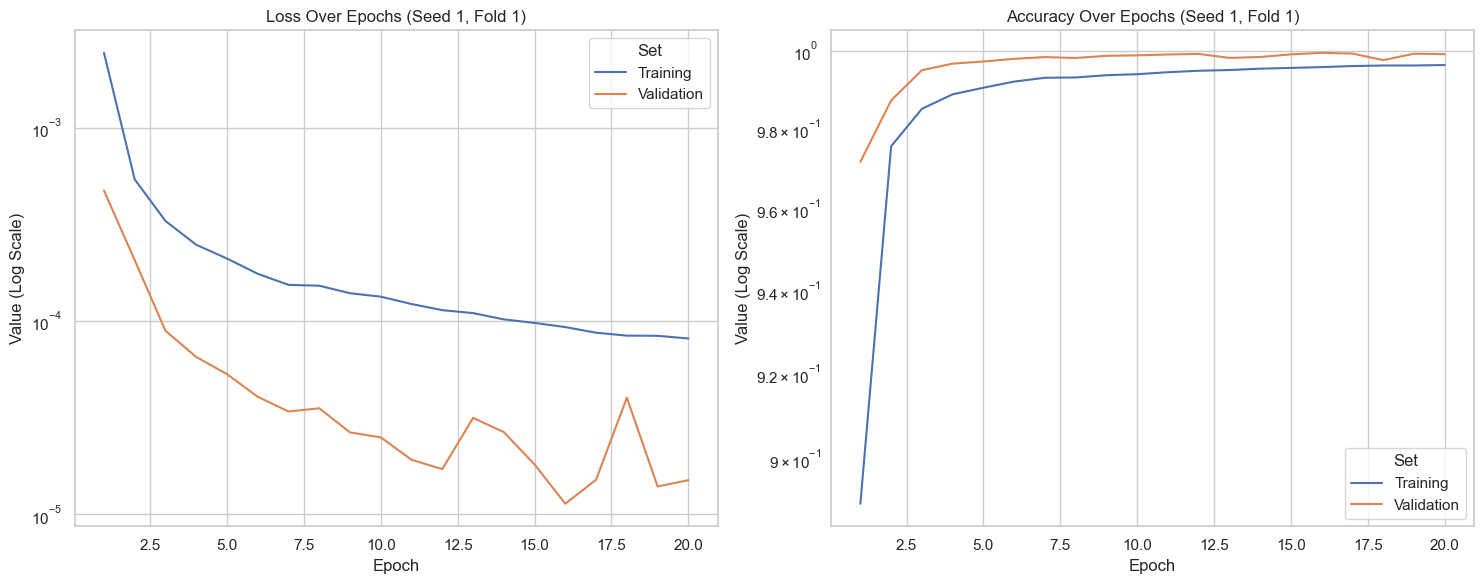

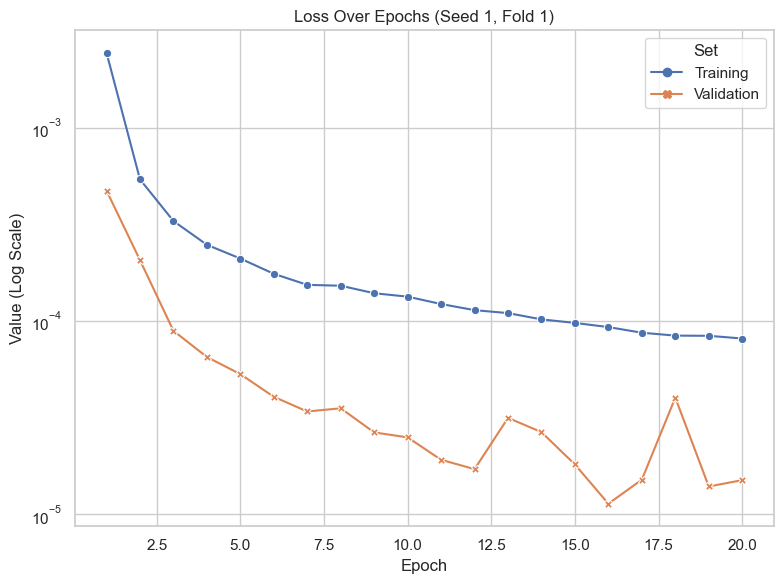

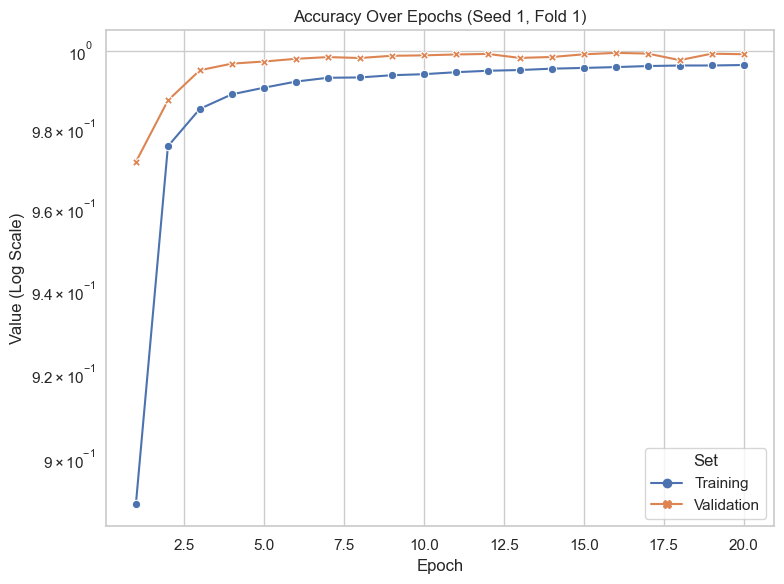

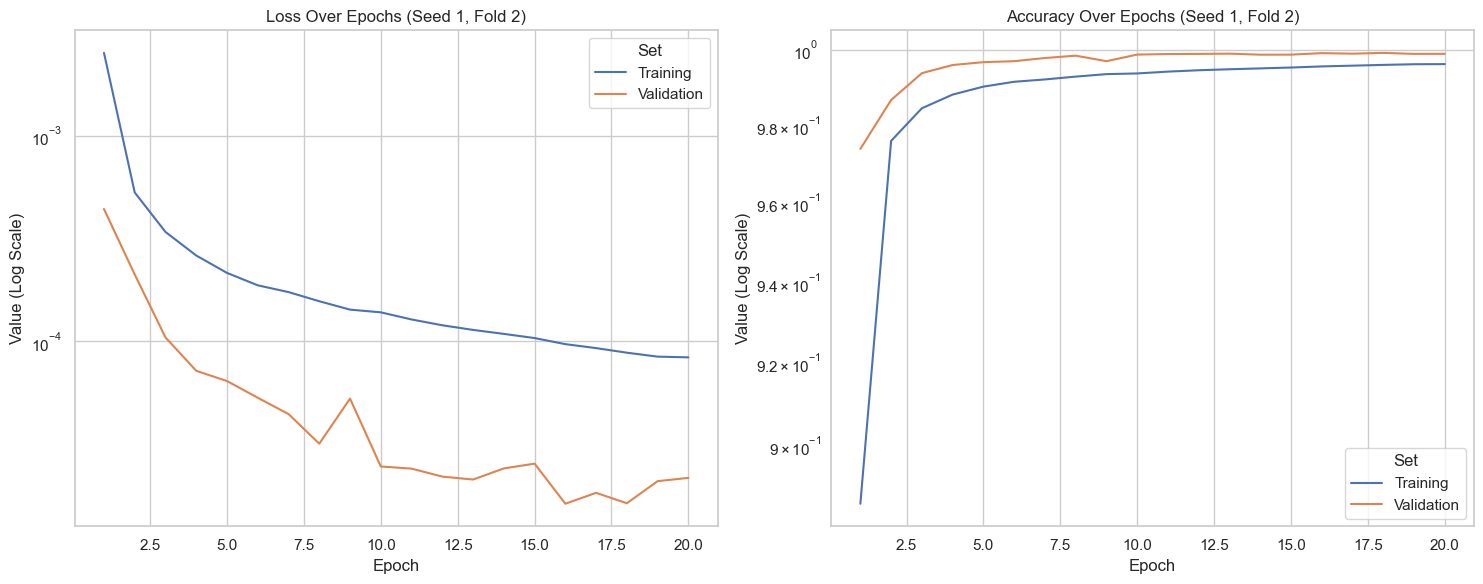

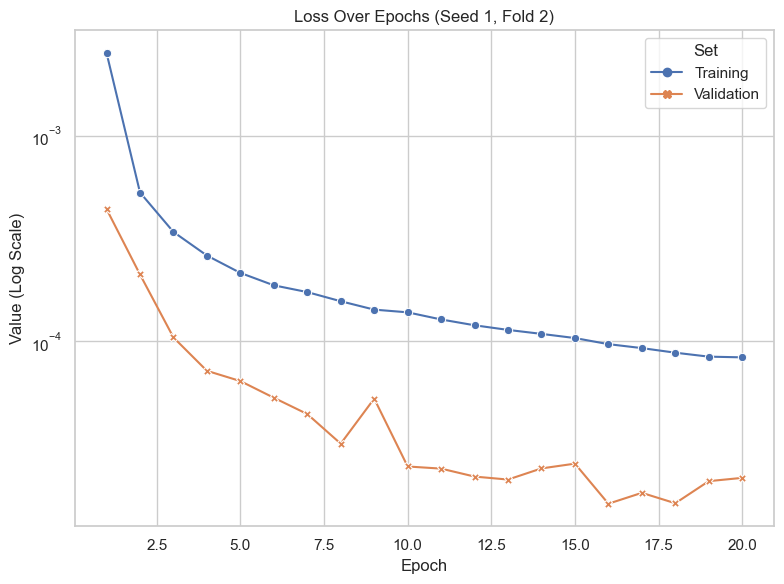

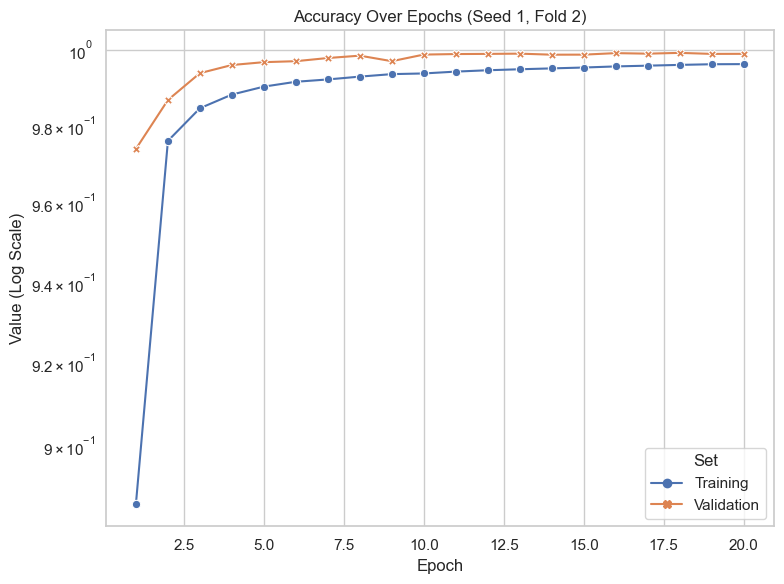

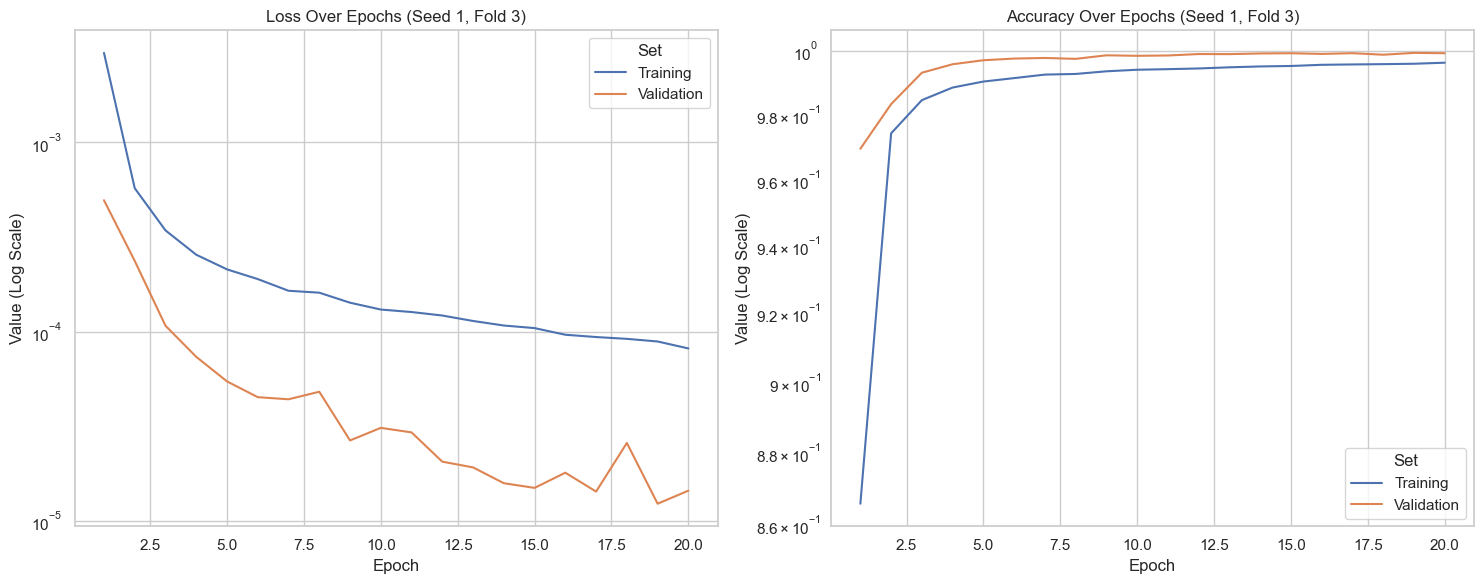

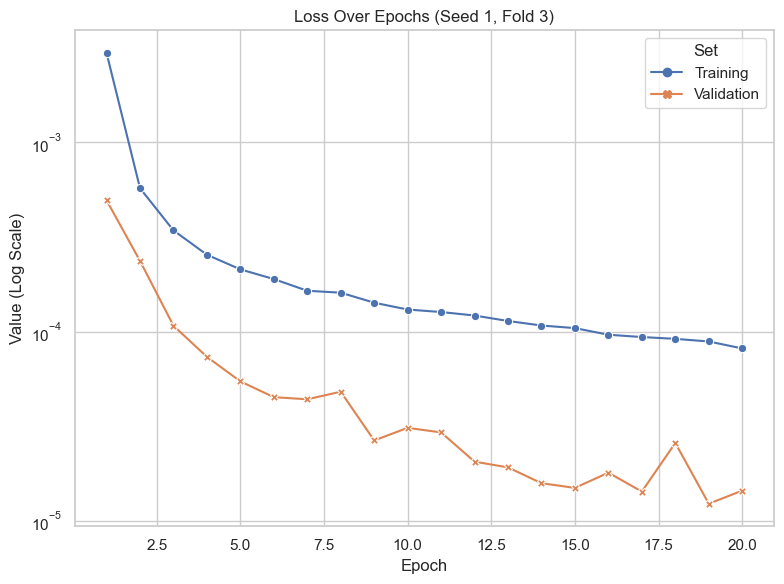

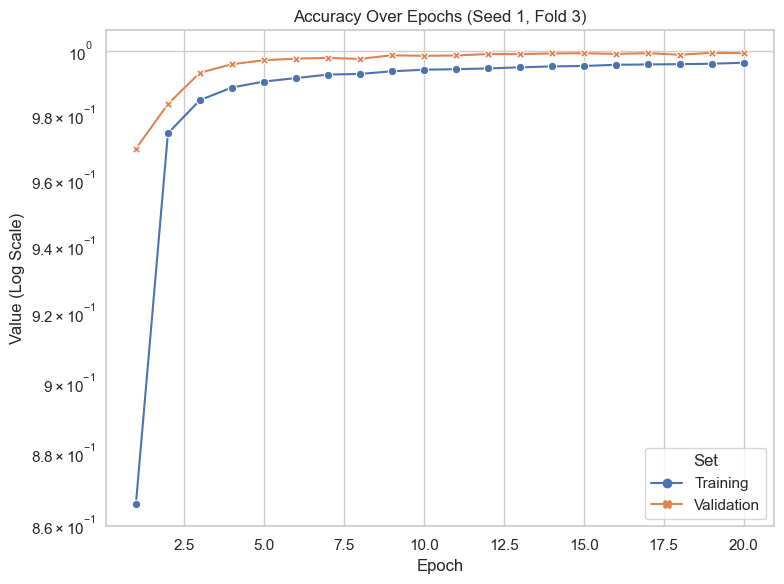

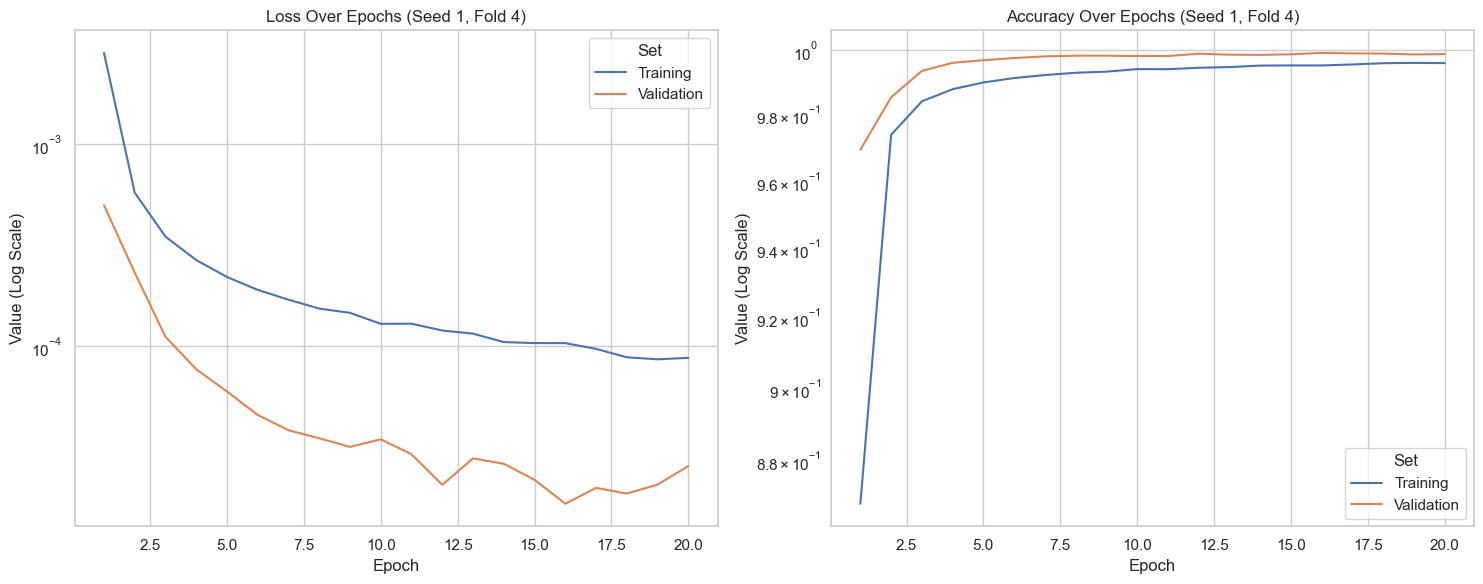

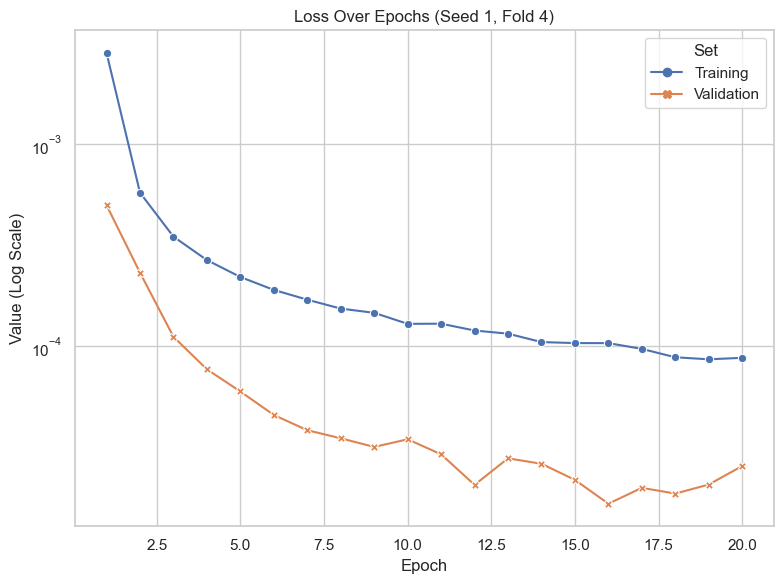

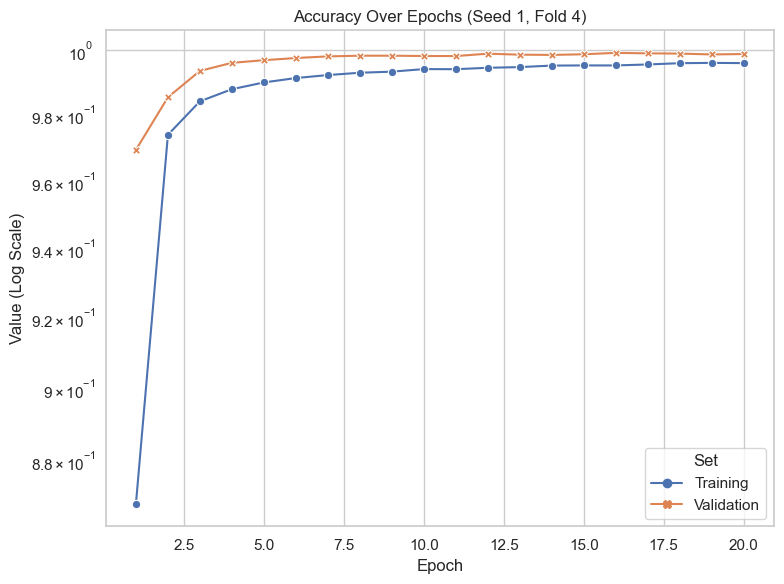

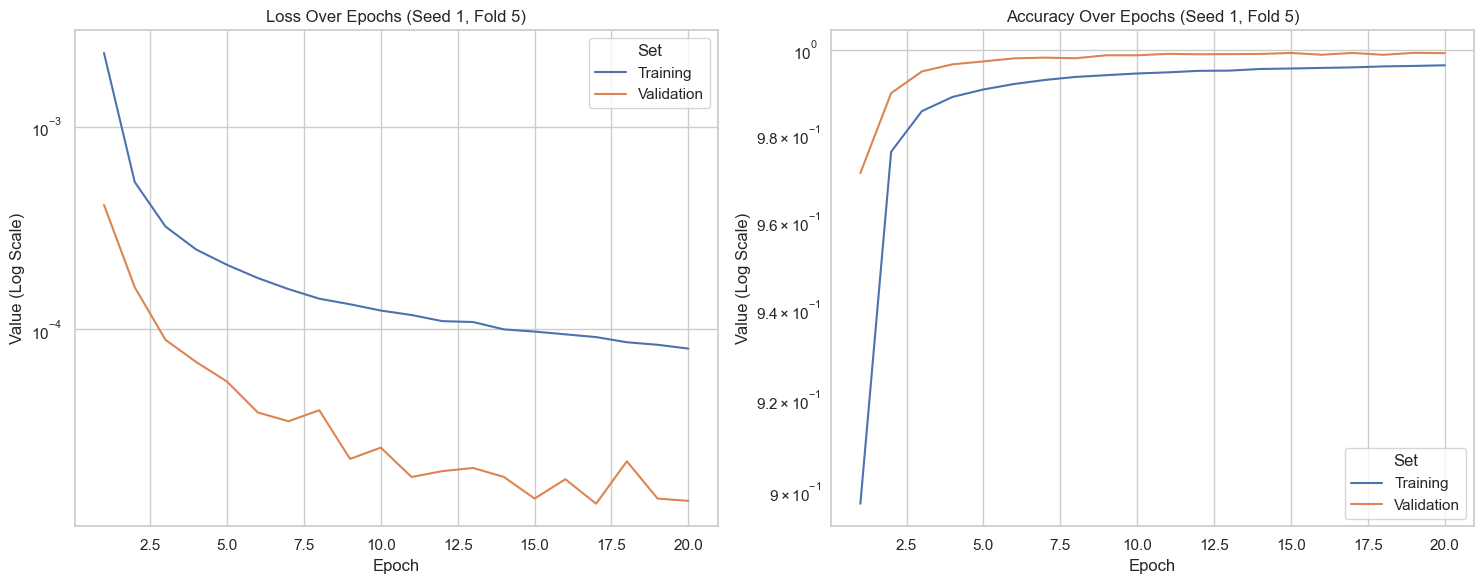

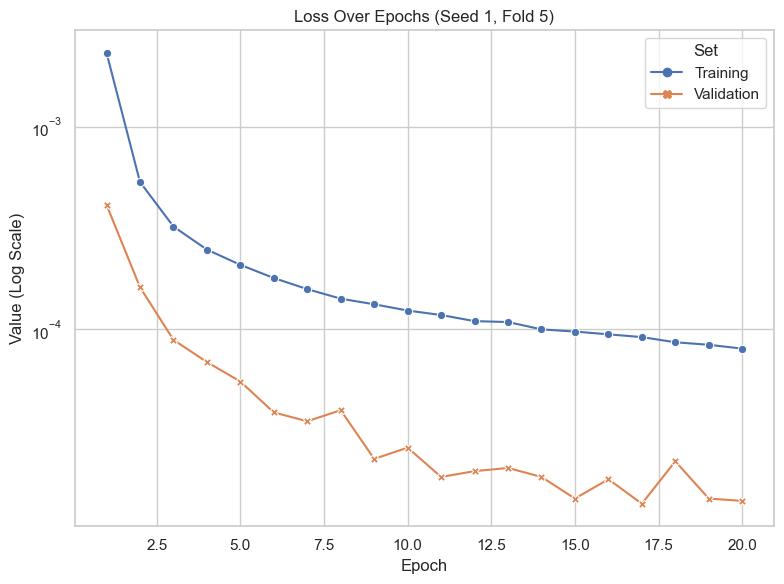

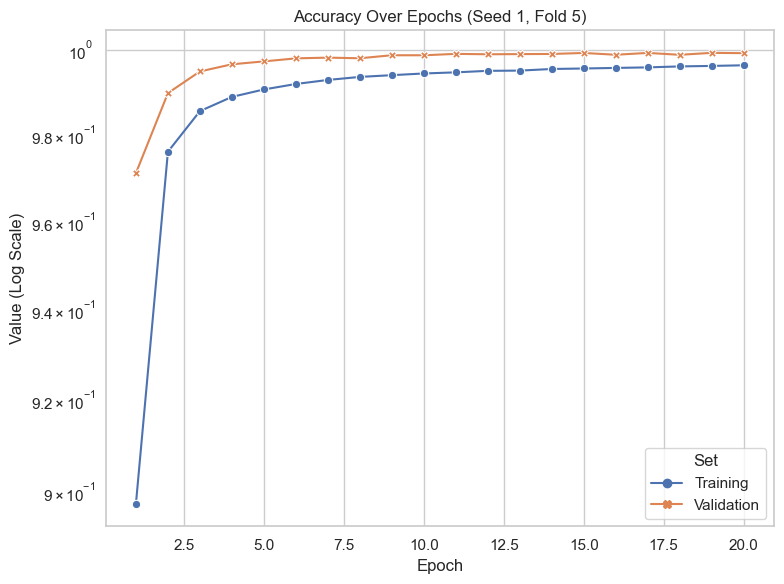

In [14]:
plot_metrics(metrics, k_fold=True, log_scale=True, save_path=f'Result/history/{reservoirname}')